In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

In [2]:
#Data pre-processing
df=pd.read_csv('book.csv')
print(df.head())
#print(df.tail())
df = df[df.GR != -999.25]
df = df[df.Neutron_porosity != -999.25]
df = df[df.PEF != -999.25]
df = df[df.Potasium != -999.25]
df = df[df.RESD != -999.25]
df = df[df.RESM != -999.25]
df = df[df.RESS != -999.25]
df = df[df.Density != -999.25]
df = df[df.THOR != -999.25]
df = df[df.URAN != -999.25]
df = df[df.DTC != -999.25]
df = df[df.DTS != -999.25]
df = df.reset_index(drop=True)

          GR  Neutron_porosity       PEF    Potasium      RESD      RESM  \
0  34.858700          0.219650  8.830400 -999.250000  2.661294  2.592666   
1  36.819408          0.216217  8.980547 -999.250000  2.346075  2.305736   
2  36.806541          0.211112  9.107201    0.762118  2.080422  2.128788   
3  34.596245          0.218566  9.098256    0.675480  2.070979  2.146933   
4  32.187355          0.227669  9.039493    0.632915  2.463068  2.513778   

       RESS   Density        THOR        URAN        DTC         DTS  
0  2.523428  2.704046 -999.250000 -999.250000  77.539398  142.440399  
1  2.194569  2.687440 -999.250000 -999.250000  74.924561  140.393494  
2  2.144159  2.677008    2.715095    0.603836  73.036903  138.190506  
3  2.216718  2.674053    2.486746    0.596240  72.451294  136.373795  
4  2.616725  2.676515    2.589289    0.576144  72.868149  134.836502  


In [3]:
#Define the dependent variable that needs to be predicted (DTC)
Y = df["DTS"]
#Define the independent variables.
X = df.drop(labels = ["DTC", "DTS"], axis=1) 
x = X.to_numpy()
y = Y.to_numpy()
y = np.reshape(y,(1, y.size))
y=np.transpose(y, axes=None)
#Scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)
scaler.fit(y)
y = scaler.transform(y)

In [4]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
256/256 [==============================] - 1s 4ms/step - loss: 0.0309 - val_loss: 0.0047
Epoch 2/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0043
Epoch 3/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0056 - val_loss: 0.0040
Epoch 4/500
256/256 [==============================] - 0s 1ms/step - loss: 0

256/256 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 74/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 75/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 76/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 77/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 78/500
256/256 [==============================] - 0s 966us/step - loss: 0.0027 - val_loss: 0.0023
Epoch 79/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 80/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 81/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 82/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss

Epoch 153/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 154/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 155/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 156/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 157/500
256/256 [==============================] - 1s 4ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 158/500
256/256 [==============================] - 1s 4ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 159/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 160/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 161/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 162/500
256/256 [==============================] - 0s 1ms/step - lo

256/256 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 233/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 234/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 235/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 236/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 237/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 238/500
256/256 [==============================] - 0s 982us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 239/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 240/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 241/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0025 -

256/256 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 312/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 313/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 314/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 315/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 316/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 317/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 318/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 319/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 320/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0024 - v

256/256 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 391/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 392/500
256/256 [==============================] - 0s 974us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 393/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 394/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 395/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 396/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 397/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 398/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 399/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0025 -

256/256 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 470/500
256/256 [==============================] - 0s 970us/step - loss: 0.0023 - val_loss: 0.0023
Epoch 471/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 472/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 473/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 474/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 475/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 476/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 477/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 478/500
256/256 [==============================] - 0s 1ms/step - loss: 0.0024 -

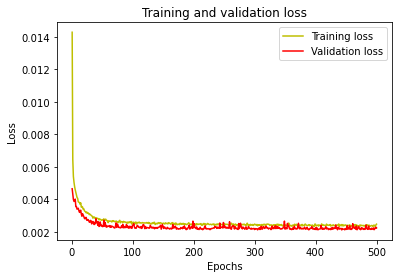

<Figure size 432x288 with 0 Axes>

In [5]:
#ann
model = Sequential()         
model.add(Dense(128, input_dim=10, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1))   
model.compile(loss='mean_squared_error',
              optimizer='adam',)             #also try other optimisers


#model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train ,verbose=1, epochs=500, 
                    validation_data=(X_test, y_test))

# Predict
y_pred_ann = model.predict(X_test)    
print("Mean sq. errror for ann =", np.mean(y_pred_ann-y_test)**2)
print(r2_score(y_test, y_pred_ann))

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('DTS1_plots/Training and validation loss.png')

In [6]:
#Decision-Tree-Regression
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegModel = DecisionTreeRegressor(max_depth=10,
                           min_samples_split=2,
                           max_leaf_nodes=150,min_samples_leaf=4)
DecisionTreeRegModel.fit(X_train,y_train)
y_pred_Decision_Tree_test = DecisionTreeRegModel.predict(X_test)
y_pred_Decision_Tree_train = DecisionTreeRegModel.predict(X_train)
print("Mean sq. errror for Decision-Tree-Regression  =", np.mean(y_pred_Decision_Tree_test-y_test)**2)
print(r2_score(y_test, y_pred_Decision_Tree_test))
print(r2_score(y_train, y_pred_Decision_Tree_train))

Mean sq. errror for Decision-Tree-Regression  = 4.341863006660928e-07
0.9157446514142502
0.9449472224446869


In [7]:
from sklearn.model_selection import KFold,GridSearchCV, cross_val_score, cross_val_predict
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [2,3],
              "max_depth": [10, 11, 12],
              "min_samples_leaf": [4, 6, 8],
              "max_leaf_nodes": [100, 150, 200],
              }
kf = KFold(n_splits=2)
## Comment in order to publish in kaggle.

grid_cv_dtm = GridSearchCV(DecisionTreeRegModel, param_grid, cv=kf)

grid_cv_dtm.fit(X_train,y_train)

print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))



R-Squared::0.9044457781084341
Best Hyperparameters::
{'criterion': 'mae', 'max_depth': 10, 'max_leaf_nodes': 150, 'min_samples_leaf': 4, 'min_samples_split': 3}


[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

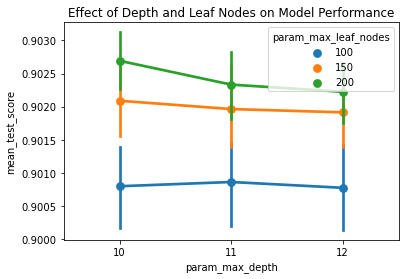

In [8]:
df1 = pd.DataFrame(data=grid_cv_dtm.cv_results_)
fig,ax = plt.subplots()
sns.pointplot(data=df1[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")



[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

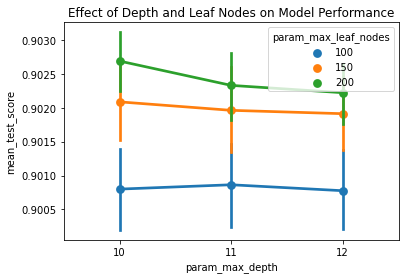

In [9]:
fig,ax = plt.subplots()
sns.pointplot(data=df1[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

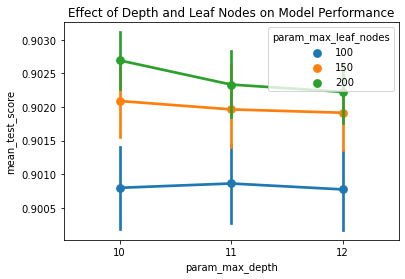

In [10]:
fig,ax = plt.subplots()
sns.pointplot(data=df1[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

In [11]:
#random forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 400,max_features='sqrt', random_state = 42,max_depth=40,min_samples_split=3,
                                  min_samples_leaf=1,bootstrap=False)
regressor.fit(X_train,y_train)
y_pred_randomforest_test = regressor.predict(X_test)
y_pred_randomforest_train = regressor.predict(X_train)
print("Mean sq. errror for randomforest  =", np.mean(y_pred_randomforest_test-y_test)**2)
print(r2_score(y_test, y_pred_randomforest_test))
print(r2_score(y_train, y_pred_randomforest_train))

<ipython-input-11-d5a57587a744>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


Mean sq. errror for randomforest  = 4.1189864541278725e-07
0.9488383310064337
0.9998885528168019


<ipython-input-12-c1123912c475>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-12-c1123912c475>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-12-c1123912c475>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-12-c1123912c475>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-12-c1123912c475>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

<ipython-input-12-c1123912c475>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-12-c1123912c475>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-12-c1123912c475>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-12-c1123912c475>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-12-c1123912c475>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

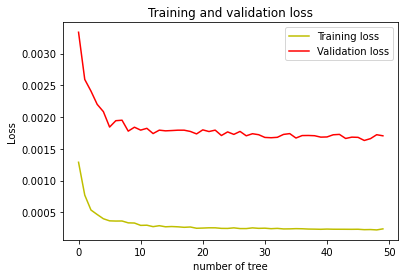

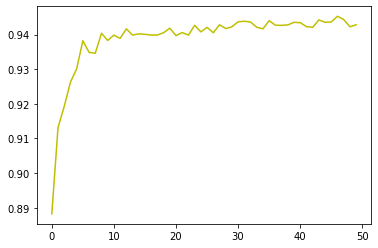

In [12]:
rf = RandomForestRegressor(n_estimators=1)
train=[]
test=[]
itera=[]
r2=[]
for iter in range(50):
    rf.fit(X_train, y_train)
    y_train_predicted = rf.predict(X_train)
    y_test_predicted = rf.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_predicted)
    mse_test = mean_squared_error(y_test, y_test_predicted)
    rf.n_estimators += 1
    R=r2_score(y_test,y_test_predicted)
    train.append(mse_train)
    test.append(mse_test)
    itera.append(iter)
    r2.append(R)

plt.plot(itera, train, 'y', label='Training loss')
plt.plot(itera, test, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('number of tree')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(itera, r2, 'y', label='Training loss')


In [13]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [40, 60, 80],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [1, 3, 5],
    'n_estimators': [200, 300, 400]
}
# Instantiate the grid search model
grid_search = GridSearchCV(regressor, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
print("R-Squared::{}".format(grid_search.best_score_))
print("Best Hyperparameters::\n{}".format(grid_search.best_params_))

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed: 33.2min finished
D:\anacondahiss\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


R-Squared::0.9464527718683863
Best Hyperparameters::
{'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 400}


In [14]:
#SVR
from sklearn.svm import SVR
regressor_svm=SVR(kernel='rbf')
regressor_svm.fit(X_train,y_train)
y_pred_svm_test=regressor_svm.predict(X_test)
y_pred_svm_train=regressor_svm.predict(X_train)
print("Mean sq. errror for SVM_rbf  =", np.mean(y_pred_svm_test-y_test)**2)
print(r2_score(y_test, y_pred_svm_test))
print(r2_score(y_train, y_pred_svm_train))

D:\anacondahiss\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Mean sq. errror for SVM_rbf  = 1.24824277847292e-05
0.8864499901095019
0.8930874522407226


In [15]:
import xgboost as xg
# Instantiation 
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',colsample_bytree=0.9,learning_rate=0.03,max_depth=18,
                        min_child_weight=3,subsample=0.4,
                  n_estimators =500) 


xgb_r.fit(X_train, y_train,verbose=True) 
  
# Predict the model 
pred_test = xgb_r.predict(X_test) 
pred_train = xgb_r.predict(X_train) 
print("Mean sq. errror for XGboost  =", np.mean(pred_test-y_test)**2)
print(r2_score(y_test, pred_test))
print(r2_score(y_train, pred_train))

Mean sq. errror for XGboost  = 6.388114523001723e-07
0.950218853076046
0.999076864493728


In [16]:
param_tuning = {
        'learning_rate': [0.03,0.1],
        'max_depth': [6,12,18],
        #'min_child_weight': [1, 3, 5],
        'subsample': [0.3, 0.4, 0.7],
        'colsample_bytree': [0.7,0.8,0.9],
        'n_estimators' : [300, 400, 500],
        'objective': ['reg:squarederror']
    }

gsearch = GridSearchCV(estimator = xgb_r,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)
gsearch.fit(X_train,y_train)
print("R-Squared::{}".format(gsearch.best_score_))
print(gsearch.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed: 15.3min finished


R-Squared::0.9479521655737343
{'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 18, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.7}


Mean sq. errror for ANN  = 7.220984319372511e-07
0.9245991696859368


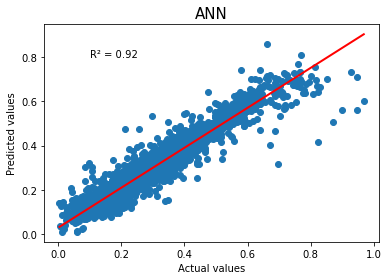

Mean sq. errror for Decision-Tree-Regression  = 4.341863006660928e-07
0.9157446514142502


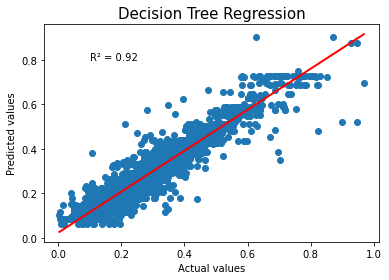

Mean sq. errror for randomforest  = 4.1189864541278725e-07
0.9488383310064337


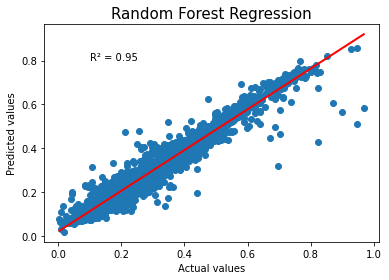

Mean sq. errror for SVM_rbf  = 1.24824277847292e-05
0.8864499901095019


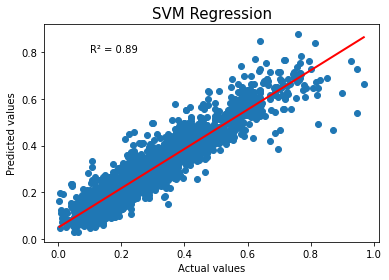

Mean sq. errror for XGboost  = 6.388114523001723e-07
0.950218853076046


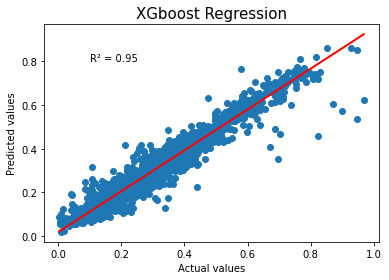

In [17]:
plt.title('ANN',fontsize=15)
print("Mean sq. errror for ANN  =", np.mean(y_pred_ann-y_test)**2)
print(r2_score(y_test, y_pred_ann))
y_testa=y_test.flatten()
y_pred_anna=y_pred_ann.flatten()
plt.scatter(y_test,y_pred_ann)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(y_testa), np.poly1d(np.polyfit(y_testa, y_pred_anna, 1))(np.unique(y_testa)),c='r',linewidth = '2')
plt.text(0.1, 0.8, 'R\u00b2 = %0.2f' % r2_score(y_testa, y_pred_anna))
plt.show()
#plt.savefig('DTS1_plots/ann.png')



plt.title('Decision Tree Regression',fontsize=15)
print("Mean sq. errror for Decision-Tree-Regression  =", np.mean(y_pred_Decision_Tree_test-y_test)**2)
print(r2_score(y_test, y_pred_Decision_Tree_test))
y_testa=y_test.flatten()
y_pred_Decision_Treea=y_pred_Decision_Tree_test.flatten()
plt.scatter(y_test,y_pred_Decision_Tree_test)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(y_testa), np.poly1d(np.polyfit(y_testa, y_pred_Decision_Treea, 1))(np.unique(y_testa)),c='r',linewidth = '2')

plt.text(0.1, 0.8, 'R\u00b2 = %0.2f' % r2_score(y_testa, y_pred_Decision_Treea))
plt.show()
#plt.savefig('DTS1_plots/Decision Tree Regression.png')



plt.title('Random Forest Regression',fontsize=15)
print("Mean sq. errror for randomforest  =", np.mean(y_pred_randomforest_test-y_test)**2)
print(r2_score(y_test, y_pred_randomforest_test))
y_testa=y_test.flatten()
y_pred_randomforesta=y_pred_randomforest_test.flatten()
plt.scatter(y_test,y_pred_randomforest_test)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(y_testa), np.poly1d(np.polyfit(y_testa, y_pred_randomforesta, 1))(np.unique(y_testa)),c='r',linewidth = '2')

plt.text(0.1, 0.8, 'R\u00b2 = %0.2f' % r2_score(y_testa, y_pred_randomforesta))
plt.show()
#plt.savefig('DTS1_plots/Random Forest.png')



plt.title('SVM Regression',fontsize=15)
print("Mean sq. errror for SVM_rbf  =", np.mean(y_pred_svm_test-y_test)**2)
print(r2_score(y_test, y_pred_svm_test))
y_testa=y_test.flatten()
y_pred_svma=y_pred_svm_test.flatten()
plt.scatter(y_test,y_pred_svm_test)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(y_testa), np.poly1d(np.polyfit(y_testa, y_pred_svma, 1))(np.unique(y_testa)),c='r',linewidth = '2')

plt.text(0.1, 0.8, 'R\u00b2 = %0.2f' % r2_score(y_testa, y_pred_svma))
plt.show()
#plt.savefig('DTS1_plots/SVM.png')


plt.title('XGboost Regression',fontsize=15)
print("Mean sq. errror for XGboost  =", np.mean(pred_test-y_test)**2)
print(r2_score(y_test, pred_test))
y_testa=y_test.flatten()
preda=pred_test.flatten()
plt.scatter(y_testa,preda)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(y_testa), np.poly1d(np.polyfit(y_testa, preda, 1))(np.unique(y_testa)),c='r',linewidth = '2')

plt.text(0.1, 0.8, 'R\u00b2 = %0.2f' % r2_score(y_testa, preda))
plt.show()
#plt.savefig('DTS1_plots/XGboost.png')